In [1]:
%matplotlib inline

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
from IPython.display import clear_output
from IPython import display

# Capture one photo

In [5]:

cam = cv2.VideoCapture(0)
ret, frame = cam.read()
cam.release()
cv2.imshow("Frame", frame)
cv2.waitKey(0)
#cv2.destroyAllWindows()

-1

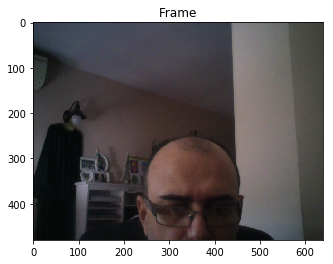

In [6]:
cam = cv2.VideoCapture(0)
ret, frame = cam.read()
cam.release()

plt.figure("Frame")
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

# Capturar video

In [7]:
cam = cv2.VideoCapture(0)
try:
    while True:
        ret, frame = cam.read()
        if not ret:
            cam.release()
            print("Released Video Resource")
            break
        cv2.imshow("Video Frame", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Released Video Resource")
            cv2.destroyAllWindows()
            break
except KeyboardInterrupt:
    cam.release()
    cv2.destroyAllWindows()
    print("Released Video Resource")
cam.release()
    

Released Video Resource


Mostrando más de una imagen, con conversion al vuelo

In [8]:
cam = cv2.VideoCapture(0)
try:
    while True:
        ret, frame = cam.read()
        if not ret:
            cam.release()
            print("Released Video Resource")
            break
        cv2.imshow("Video Frame", frame)
        cv2.imshow("Video Frame2", cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            print("Released Video Resource")
            cv2.destroyAllWindows()
            break
except KeyboardInterrupt:
    cam.release()
    cv2.destroyAllWindows()
    print("Released Video Resource")
cam.release()
    

Released Video Resource


# Video usando Jupyter Notebook y Matplotlib

In [9]:
import sys

Released Video Resource


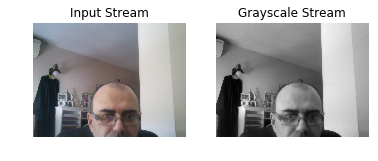

In [10]:
cap = cv2.VideoCapture(0)
fg, ax = plt.subplots(ncols=2)
try:
    while True:
        ret, frame = cap.read()
        if not ret:
            cap.release()
            print("Released Video Resource")
            break
        # Convertir la imagen de openCV (BGR) a matplotlib (RGB)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        grayscale = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        ax[0].axis('off')
        ax[1].axis('off')
        ax[0].set_title('Input Stream')
        ax[1].set_title('Grayscale Stream')
        ax[0].imshow(frame)
        ax[1].imshow(grayscale, cmap='binary_r')
        #plt.show()
        clear_output(wait=True)
        display.display(plt.gcf())
        #plt.show()
except KeyboardInterrupt:
    cap.release()
    print("Released Video Resource")
cap.release()        

In [8]:
cap.release()

NameError: name 'cap' is not defined

# Hacer una grabación

In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import  animation, rc

In [2]:
cam = cv2.VideoCapture(0)
fig, ax = plt.subplots() 
ax.axis('off')
ax.set_title('Input Stream')
ret, frame = cam.read()
im = ax.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB),animated=True)
#cam.release()
def update_video(i, cam, *args):
    #cam = cv2.VideoCapture(0)
    ret, frame = cam.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    im.set_data(frame)
    #cam.release()
    return (im,)
ani = animation.FuncAnimation(fig, update_video,  frames=900, interval=30, blit=True, fargs=(cam,))
HTML(ani.to_html5_video(),)
cam.release()

In [3]:
HTML(ani.to_html5_video(),)

# Usando directmente la escritura en disco de OpenCV

In [4]:
cam = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'X264')
out = cv2.VideoWriter('test_output.mp4', fourcc, 25, (640,480))
while True:
    ret, frame = cam.read()
    out.write(frame)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        breakq
        
cv2.destroyAllWindows()
cam.release()
out.release()

In [12]:
cam.release()

In [6]:
HTML("""
<video width="320" height="240" controls>
  <source src="test_output.mp4" type="video/mp4">
</video>
""")

# Cargar un video

In [11]:
cam = cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc(*'X264')
out = cv2.VideoWriter('test_output.mp4', fourcc, 25, (640,480))
while True:
    ret, frame = cam.read()
    out.write(frame)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cv2.destroyAllWindows()
cam.release()
out.release()

HTML("""
<video width="320" height="240" controls>
  <source src="test_output.mp4" type="video/mp4">
</video>
""")

<video width="320" height="240" controls>
  <source src="test_output.mp4" type="video/mp4">
</video>

In [13]:
%%writefile camera.py
import cv2

class VideoCamera(object):
    def __init__(self):
        # Using OpenCV to capture from device 0. If you have trouble capturing
        # from a webcam, comment the line below out and use a video file
        # instead.
        self.video = cv2.VideoCapture(0)
        # If you decide to use video.mp4, you must have this file in the folder
        # as the main.py.
        # self.video = cv2.VideoCapture('video.mp4')
    
    def __del__(self):
        self.video.release()
    
    def get_frame(self):
        success, image = self.video.read()
        # We are using Motion JPEG, but OpenCV defaults to capture raw images,
        # so we must encode it into JPEG in order to correctly display the
        # video stream.
        ret, jpeg = cv2.imencode('.jpg', image)
        return jpeg.tobytes()

Overwriting camera.py


In [ ]:
a=VideoC